In [1]:
import numpy as np

In [14]:
class GeneticAlgorithm():
    def __init__(self, printEvery,numPopulation,numSurvived,mutationProbs,evaluateFunction,ranges,initialValues=None):
        self.printEvery = printEvery
        self.numPopulation = numPopulation
        self.numParams = len(ranges)
        self.ranges = ranges
        self.evaluateFunction = evaluateFunction
        self.mutationProbs = mutationProbs
        self.mutationScale = 1
        self.numSurvived = numSurvived
        self.fitnessProbs = []
        self.hist = [[],[],[]]
        if not initialValues:
            self.randomGeneration()
        else:
            self.population = initialValues  
        self.evaluation(0)
        
        
    def randomGeneration(self):
        population = []
        for i in range(self.numPopulation):
            individual = []
            for lowerBound, upperBound in self.ranges:
                individual += [np.random.uniform(lowerBound,upperBound)]
            population += [np.array(individual)]
        self.population = population
    
    
    def crossover(self,a,b):
        n = len(a)
        numberOfCrossover = np.random.randint(n)
        indicesChosen = np.random.choice(np.arange(n-1),numberOfCrossover,replace=False)
        indicesChosen = indicesChosen.astype(int)
        c=a.copy()
        c[indicesChosen] = b[indicesChosen]
        return c
    
    
    def mutation(self,a):
        conditionList = [(np.random.rand(1)<i)[0] for i in self.mutationProbs]
        indicesChosen = np.take(conditionList,np.arange(self.numParams))
        mutationRanges = np.array([self.mutationScale*(upper-lower)/2 if index in indicesChosen else 0\
                                  for index,(lower,upper) in enumerate(self.ranges)])
        mutationValues = np.array([np.random.uniform(-mutationRanges[index],mutationRanges[index]) \
                                  if index in indicesChosen else 0\
                                  for index in range(self.numParams)])
        a += mutationValues
        return a
    def evaluation(self,iteration='final'):
        
        fitnesses = []
        for individual in self.population:
            fitnesses+=[self.evaluateFunction(individual)]
        fitnesses = np.array(fitnesses)
        self.fitnessProbs = fitnesses/np.sum(fitnesses)
        if iteration!='final':
                self.hist[0] += [max(fitnesses)]
                self.hist[1] += [np.average(fitnesses)]
                self.hist[1] += [np.var(fitnesses)]
        if iteration==0 or iteration=='final' or iteration % self.printEvery == 0:
            
            print("====\niteration",iteration,"\n"+\
                  "max fitness",round(max(fitnesses),4),", avg fitness",round(np.average(fitnesses),4),\
                  ", min fitness",round(min(fitnesses),4),", variance",round(np.var(fitnesses),4),"\n====\n")
        
    def reproduction(self,iteration):
        topKIndices = np.argsort(self.fitnessProbs)[-self.numSurvived:][::-1] if self.numSurvived>0 else None
        
        newGeneration = [self.population[i] for i in topKIndices] if self.numSurvived>0 else []
        numReproduced = self.numPopulation - self.numSurvived
        
        
        parent1 = np.random.choice(np.arange(self.numPopulation),numReproduced,p=self.fitnessProbs)
        parent2 = np.random.choice(np.arange(self.numPopulation),numReproduced,p=self.fitnessProbs)
        for i in range(numReproduced):
            newIndividual = self.crossover(self.population[parent1[i]],self.population[parent2[i]])    
            newGeneration += [self.mutation(newIndividual)]
            
        self.population = newGeneration
        
        self.evaluation(iteration)
            

In [37]:
a=np.array([[1,2]]).tolist()
a

[[1, 2]]

In [15]:
maxHist,avgHist,varHist = [],[],[]

In [21]:
np.random.seed(0)
testRanges = [[-2,2],[-5,5],[-4,7],[-1,2],[-3,3],[-1,1]] 
optimal = np.array([0,0,0,0,0,0])
testEval = lambda x: 1/np.sum((x-optimal)**2)**.5
GA = GeneticAlgorithm(printEvery=10,numPopulation=5,numSurvived=1,mutationProbs=[.5]*len(testRanges),\
                      evaluateFunction=testEval,ranges=testRanges)
print("initial pop",GA.population,"\n")
for i in range(100):
    GA.reproduction(i+1)
GA.evaluation()
maxHist,avgHist,varHist = GA.hist
print("final pop",GA.population)

====
iteration 0 
max fitness 0.2853 , avg fitness 0.1945 , min fitness 0.126 , variance 0.0049 
====

initial pop [array([ 0.19525402,  2.15189366,  2.63039714,  0.63464955, -0.4580712 ,
        0.29178823]), array([-0.24965115,  3.91773001,  6.60029037,  0.15032456,  1.75035023,
        0.05778984]), array([ 0.27217824,  4.25596638, -3.21860336, -0.7386121 , -2.87868962,
        0.66523969]), array([ 1.112627  ,  3.70012148,  6.76480176,  1.39747569, -0.23112383,
        0.56105835]), array([-1.5269023 ,  1.39921021, -2.42311384,  1.83400675,  0.13108993,
       -0.17067612])] 

====
iteration 10 
max fitness 0.3556 , avg fitness 0.246 , min fitness 0.1101 , variance 0.007 
====

====
iteration 20 
max fitness 0.3613 , avg fitness 0.2513 , min fitness 0.1396 , variance 0.009 
====

====
iteration 30 
max fitness 0.3613 , avg fitness 0.2436 , min fitness 0.1283 , variance 0.0102 
====

====
iteration 40 
max fitness 0.3613 , avg fitness 0.2965 , min fitness 0.2167 , variance 0.0028 
=

In [22]:
import matplotlib.pyplot as plt

====
iteration 0 
max fitness 0.3144 , avg fitness 0.1991 , min fitness 0.126 , variance 0.003 
====

initial pop [array([ 0.19525402,  2.15189366,  2.63039714,  0.63464955, -0.4580712 ,
        0.29178823]), array([-0.24965115,  3.91773001,  6.60029037,  0.15032456,  1.75035023,
        0.05778984]), array([ 0.27217824,  4.25596638, -3.21860336, -0.7386121 , -2.87868962,
        0.66523969]), array([ 1.112627  ,  3.70012148,  6.76480176,  1.39747569, -0.23112383,
        0.56105835]), array([-1.5269023 ,  1.39921021, -2.42311384,  1.83400675,  0.13108993,
       -0.17067612]), array([-0.94177755,  2.74233689,  1.01765365,  0.70530185, -2.8872612 ,
        0.23527099]), array([ 0.44838289,  1.16933997,  6.38122886,  1.0454609 , -0.8429526 ,
       -0.12593609]), array([ 0.79052478, -4.39774528,  3.33443387,  1.01191361, -1.73770463,
       -0.7421474 ]), array([-0.7382866 , -1.36289229,  2.27216447,  0.31580454,  2.93024303,
       -0.79591038]), array([-1.16449298, -3.38690482,  3.184

====
iteration 100 
max fitness 0.407 , avg fitness 0.2269 , min fitness 0.0696 , variance 0.01 
====

====
iteration 125 
max fitness 0.4788 , avg fitness 0.3132 , min fitness 0.1179 , variance 0.0121 
====

====
iteration 150 
max fitness 0.5133 , avg fitness 0.3382 , min fitness 0.1353 , variance 0.0177 
====

====
iteration 175 
max fitness 0.5291 , avg fitness 0.2913 , min fitness 0.117 , variance 0.0125 
====

====
iteration 200 
max fitness 0.5372 , avg fitness 0.3219 , min fitness 0.109 , variance 0.0183 
====

====
iteration 225 
max fitness 0.4769 , avg fitness 0.2466 , min fitness 0.0966 , variance 0.0115 
====

====
iteration 250 
max fitness 0.5389 , avg fitness 0.3019 , min fitness 0.1184 , variance 0.0191 
====

====
iteration 275 
max fitness 0.5159 , avg fitness 0.2871 , min fitness 0.1171 , variance 0.0141 
====

====
iteration 300 
max fitness 0.5319 , avg fitness 0.2721 , min fitness 0.1215 , variance 0.0143 
====

====
iteration 325 
max fitness 0.5186 , avg fitnes

====
iteration 25 
max fitness 0.6956 , avg fitness 0.3301 , min fitness 0.1287 , variance 0.0298 
====

====
iteration 50 
max fitness 0.7535 , avg fitness 0.278 , min fitness 0.1077 , variance 0.0383 
====

====
iteration 75 
max fitness 0.6382 , avg fitness 0.3288 , min fitness 0.1252 , variance 0.0197 
====

====
iteration 100 
max fitness 0.6559 , avg fitness 0.297 , min fitness 0.0683 , variance 0.0275 
====

====
iteration 125 
max fitness 0.7708 , avg fitness 0.2949 , min fitness 0.1357 , variance 0.0278 
====

====
iteration 150 
max fitness 0.7283 , avg fitness 0.361 , min fitness 0.0996 , variance 0.0426 
====

====
iteration 175 
max fitness 0.5867 , avg fitness 0.2328 , min fitness 0.0825 , variance 0.0162 
====

====
iteration 200 
max fitness 0.5356 , avg fitness 0.3178 , min fitness 0.0902 , variance 0.0155 
====

====
iteration 225 
max fitness 0.4187 , avg fitness 0.2438 , min fitness 0.1132 , variance 0.0077 
====

====
iteration 250 
max fitness 0.7664 , avg fitness

====
iteration 75 
max fitness 0.4735 , avg fitness 0.2038 , min fitness 0.0777 , variance 0.0132 
====

====
iteration 100 
max fitness 0.5599 , avg fitness 0.247 , min fitness 0.102 , variance 0.0134 
====

====
iteration 125 
max fitness 0.5178 , avg fitness 0.2729 , min fitness 0.1202 , variance 0.0168 
====

====
iteration 150 
max fitness 0.3856 , avg fitness 0.2128 , min fitness 0.1119 , variance 0.0056 
====

====
iteration 175 
max fitness 0.4144 , avg fitness 0.1958 , min fitness 0.0872 , variance 0.0068 
====

====
iteration 200 
max fitness 0.3872 , avg fitness 0.227 , min fitness 0.0953 , variance 0.0076 
====

====
iteration 225 
max fitness 0.5188 , avg fitness 0.2344 , min fitness 0.1228 , variance 0.0117 
====

====
iteration 250 
max fitness 0.5366 , avg fitness 0.3217 , min fitness 0.1144 , variance 0.0142 
====

====
iteration 275 
max fitness 0.4726 , avg fitness 0.2215 , min fitness 0.1046 , variance 0.0085 
====

====
iteration 300 
max fitness 0.4518 , avg fitne

====
iteration 50 
max fitness 0.3495 , avg fitness 0.2106 , min fitness 0.0917 , variance 0.0058 
====

====
iteration 75 
max fitness 0.3395 , avg fitness 0.2338 , min fitness 0.098 , variance 0.0044 
====

====
iteration 100 
max fitness 0.3138 , avg fitness 0.2099 , min fitness 0.1267 , variance 0.004 
====

====
iteration 125 
max fitness 0.36 , avg fitness 0.2175 , min fitness 0.0761 , variance 0.0081 
====

====
iteration 150 
max fitness 0.351 , avg fitness 0.2288 , min fitness 0.0983 , variance 0.0046 
====

====
iteration 175 
max fitness 0.3656 , avg fitness 0.2284 , min fitness 0.0978 , variance 0.0064 
====

====
iteration 200 
max fitness 0.3664 , avg fitness 0.2212 , min fitness 0.0841 , variance 0.0076 
====

====
iteration 225 
max fitness 0.3242 , avg fitness 0.1915 , min fitness 0.0804 , variance 0.0047 
====

====
iteration 250 
max fitness 0.3403 , avg fitness 0.1922 , min fitness 0.1066 , variance 0.0034 
====

====
iteration 275 
max fitness 0.3195 , avg fitness 

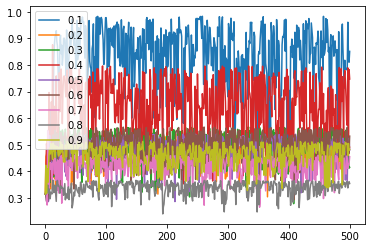

In [29]:
for p in [.1,.2,.3,.4,.5,.6,.7,.8,.9,]:
    np.random.seed(0)
    testRanges = [[-2,2],[-5,5],[-4,7],[-1,2],[-3,3],[-1,1]] 
    optimal = np.array([0,0,0,0,0,0])
    testEval = lambda x: 1/np.sum((x-optimal)**2)**.5
    GA = GeneticAlgorithm(printEvery=25,numPopulation=20,numSurvived=0,mutationProbs=[p]*len(testRanges),\
                          evaluateFunction=testEval,ranges=testRanges)
    print("initial pop",GA.population,"\n")
    for i in range(500):
        GA.reproduction(i+1)
    GA.evaluation()
    maxHist,avgHist,varHist = GA.hist
    array = maxHist
    plt.plot(np.arange(len(array)),array,label=str(p))
    print("final pop",GA.population)
plt.legend()

====
iteration 0 
max fitness 0.3144 , avg fitness 0.1991 , min fitness 0.126 , variance 0.003 
====

initial pop [array([ 0.19525402,  2.15189366,  2.63039714,  0.63464955, -0.4580712 ,
        0.29178823]), array([-0.24965115,  3.91773001,  6.60029037,  0.15032456,  1.75035023,
        0.05778984]), array([ 0.27217824,  4.25596638, -3.21860336, -0.7386121 , -2.87868962,
        0.66523969]), array([ 1.112627  ,  3.70012148,  6.76480176,  1.39747569, -0.23112383,
        0.56105835]), array([-1.5269023 ,  1.39921021, -2.42311384,  1.83400675,  0.13108993,
       -0.17067612]), array([-0.94177755,  2.74233689,  1.01765365,  0.70530185, -2.8872612 ,
        0.23527099]), array([ 0.44838289,  1.16933997,  6.38122886,  1.0454609 , -0.8429526 ,
       -0.12593609]), array([ 0.79052478, -4.39774528,  3.33443387,  1.01191361, -1.73770463,
       -0.7421474 ]), array([-0.7382866 , -1.36289229,  2.27216447,  0.31580454,  2.93024303,
       -0.79591038]), array([-1.16449298, -3.38690482,  3.184

====
iteration 25 
max fitness 1.2764 , avg fitness 0.3669 , min fitness 0.081 , variance 0.0676 
====

====
iteration 50 
max fitness 1.3195 , avg fitness 0.5415 , min fitness 0.1599 , variance 0.1241 
====

====
iteration 75 
max fitness 1.3195 , avg fitness 0.4663 , min fitness 0.1075 , variance 0.1264 
====

====
iteration 100 
max fitness 1.3195 , avg fitness 0.4468 , min fitness 0.1378 , variance 0.084 
====

====
iteration final 
max fitness 1.3195 , avg fitness 0.4468 , min fitness 0.1378 , variance 0.084 
====

final pop [array([-0.01145256,  0.00808432, -0.50218503,  0.24278898,  0.45567897,
        0.23527099]), array([-0.26342327,  6.50344746, -0.50218503,  0.24278898,  0.45567897,
        0.23527099]), array([-0.76217059,  1.61222503, -0.50218503,  0.24278898,  0.45567897,
        0.23527099]), array([ 0.58349565,  4.52115456, -0.50218503,  0.24278898,  0.45567897,
        0.23527099]), array([-2.43406499,  0.33143102, -0.50218503,  0.24278898,  0.45567897,
        0.23527

====
iteration 25 
max fitness 0.5366 , avg fitness 0.318 , min fitness 0.1294 , variance 0.015 
====

====
iteration 50 
max fitness 0.5366 , avg fitness 0.2842 , min fitness 0.1288 , variance 0.0132 
====

====
iteration 75 
max fitness 0.5366 , avg fitness 0.289 , min fitness 0.1225 , variance 0.0156 
====

====
iteration 100 
max fitness 0.5376 , avg fitness 0.2647 , min fitness 0.0894 , variance 0.0122 
====

====
iteration final 
max fitness 0.5376 , avg fitness 0.2647 , min fitness 0.0894 , variance 0.0122 
====

final pop [array([ 0.020563  , -0.03055349,  1.75572859,  0.31580454,  0.45567897,
       -0.26254966]), array([-1.9496542 , -6.07132656,  1.75572859,  0.31580454,  0.45567897,
       -0.26254966]), array([ 2.56319795, 10.72299833,  1.75572859,  0.31580454,  0.45567897,
       -0.26254966]), array([-0.57255047, -2.83381611,  1.75572859,  0.31580454,  0.45567897,
       -0.26254966]), array([-1.95606818, -1.13054035,  1.75572859,  0.31580454,  0.45567897,
       -0.26254

        0.38506318])] 

====
iteration 25 
max fitness 0.5327 , avg fitness 0.2687 , min fitness 0.157 , variance 0.0096 
====

====
iteration 50 
max fitness 0.5329 , avg fitness 0.2961 , min fitness 0.0965 , variance 0.0137 
====

====
iteration 75 
max fitness 0.5336 , avg fitness 0.2697 , min fitness 0.1461 , variance 0.0099 
====

====
iteration 100 
max fitness 0.5336 , avg fitness 0.2105 , min fitness 0.0942 , variance 0.0125 
====

====
iteration final 
max fitness 0.5336 , avg fitness 0.2105 , min fitness 0.0942 , variance 0.0125 
====

final pop [array([ 0.02848902,  0.20643116,  0.91837916, -0.88243662, -1.30315822,
        0.38494424]), array([ 1.63406252, -2.28610858,  0.91837916, -0.88243662, -1.30315822,
        0.38494424]), array([-0.3317347 ,  2.76028058,  0.91837916, -0.88243662, -1.30315822,
        0.38494424]), array([-1.24087475,  7.0155956 ,  0.91837916, -0.88243662, -1.30315822,
        0.38494424]), array([ 2.36106918, -6.89349488,  0.91837916, -0.88243662, -1

====
iteration 25 
max fitness 0.5605 , avg fitness 0.3091 , min fitness 0.0926 , variance 0.0244 
====

====
iteration 50 
max fitness 0.5607 , avg fitness 0.313 , min fitness 0.0775 , variance 0.0185 
====

====
iteration 75 
max fitness 0.5607 , avg fitness 0.31 , min fitness 0.0939 , variance 0.0152 
====

====
iteration 100 
max fitness 0.5607 , avg fitness 0.3224 , min fitness 0.1472 , variance 0.0125 
====

====
iteration final 
max fitness 0.5607 , avg fitness 0.3224 , min fitness 0.1472 , variance 0.0125 
====

final pop [array([-0.09273422,  0.032257  , -0.50218503, -0.88243662, -1.30315822,
        0.66523969]), array([-0.3584949 ,  3.60700929, -0.50218503, -0.88243662, -1.30315822,
        0.66523969]), array([ 2.84609988, -3.04313608, -0.50218503, -0.88243662, -1.30315822,
        0.66523969]), array([ 1.47132599,  0.32879038, -0.50218503, -0.88243662, -1.30315822,
        0.66523969]), array([ 2.02604788, -3.70280317, -0.50218503, -0.88243662, -1.30315822,
        0.66523

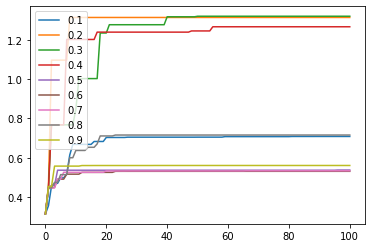

In [27]:
for p in [.1,.2,.3,.4,.5,.6,.7,.8,.9,]:
    np.random.seed(0)
    testRanges = [[-2,2],[-5,5],[-4,7],[-1,2],[-3,3],[-1,1]] 
    optimal = np.array([0,0,0,0,0,0])
    testEval = lambda x: 1/np.sum((x-optimal)**2)**.5
    GA = GeneticAlgorithm(printEvery=25,numPopulation=20,numSurvived=1,mutationProbs=[p]*len(testRanges),\
                          evaluateFunction=testEval,ranges=testRanges)
    print("initial pop",GA.population,"\n")
    for i in range(100):
        GA.reproduction(i+1)
    GA.evaluation()
    maxHist,avgHist,varHist = GA.hist
    array = maxHist
    plt.plot(np.arange(len(array)),array,label=str(p))
    print("final pop",GA.population)
plt.legend()

====
iteration 0 
max fitness 0.3144 , avg fitness 0.1991 , min fitness 0.126 , variance 0.003 
====

initial pop [array([ 0.19525402,  2.15189366,  2.63039714,  0.63464955, -0.4580712 ,
        0.29178823]), array([-0.24965115,  3.91773001,  6.60029037,  0.15032456,  1.75035023,
        0.05778984]), array([ 0.27217824,  4.25596638, -3.21860336, -0.7386121 , -2.87868962,
        0.66523969]), array([ 1.112627  ,  3.70012148,  6.76480176,  1.39747569, -0.23112383,
        0.56105835]), array([-1.5269023 ,  1.39921021, -2.42311384,  1.83400675,  0.13108993,
       -0.17067612]), array([-0.94177755,  2.74233689,  1.01765365,  0.70530185, -2.8872612 ,
        0.23527099]), array([ 0.44838289,  1.16933997,  6.38122886,  1.0454609 , -0.8429526 ,
       -0.12593609]), array([ 0.79052478, -4.39774528,  3.33443387,  1.01191361, -1.73770463,
       -0.7421474 ]), array([-0.7382866 , -1.36289229,  2.27216447,  0.31580454,  2.93024303,
       -0.79591038]), array([-1.16449298, -3.38690482,  3.184

====
iteration 25 
max fitness 0.6517 , avg fitness 0.3796 , min fitness 0.1344 , variance 0.0202 
====

====
iteration 50 
max fitness 0.6517 , avg fitness 0.3106 , min fitness 0.0908 , variance 0.0328 
====

====
iteration 75 
max fitness 0.6517 , avg fitness 0.328 , min fitness 0.1605 , variance 0.0193 
====

====
iteration 100 
max fitness 0.6517 , avg fitness 0.2898 , min fitness 0.0769 , variance 0.0306 
====

====
iteration final 
max fitness 0.6517 , avg fitness 0.2898 , min fitness 0.0769 , variance 0.0306 
====

final pop [array([-0.00838625,  0.03207316,  1.01765365,  0.728472  , -0.4580712 ,
       -0.75960688]), array([-0.03593197,  0.03207316,  1.01765365,  0.728472  , -0.4580712 ,
       -0.75960688]), array([ 1.07001843,  5.27709609,  1.01765365,  0.728472  , -0.4580712 ,
       -0.75960688]), array([  0.86690059, -11.20290055,   1.01765365,   0.728472  ,
        -0.4580712 ,  -0.75960688]), array([ 0.531692  , -3.29128281,  1.01765365,  0.728472  , -0.4580712 ,
       

====
iteration 25 
max fitness 0.4825 , avg fitness 0.2611 , min fitness 0.0968 , variance 0.0143 
====

====
iteration 50 
max fitness 0.4825 , avg fitness 0.2874 , min fitness 0.126 , variance 0.0148 
====

====
iteration 75 
max fitness 0.4842 , avg fitness 0.2876 , min fitness 0.0985 , variance 0.012 
====

====
iteration 100 
max fitness 0.4903 , avg fitness 0.3186 , min fitness 0.1017 , variance 0.0127 
====

====
iteration final 
max fitness 0.4903 , avg fitness 0.3186 , min fitness 0.1017 , variance 0.0127 
====

final pop [array([-0.14528611, -0.1169788 ,  1.75572859, -0.88243662, -0.4580712 ,
        0.29178823]), array([ 0.12990252,  0.20540298,  1.75572859, -0.88243662, -0.4580712 ,
        0.29178823]), array([ 1.77808461,  3.75145984,  1.75572859, -0.88243662, -0.4580712 ,
        0.29178823]), array([ 1.5662978 ,  4.04341607,  1.75572859, -0.88243662, -0.4580712 ,
        0.29178823]), array([ 0.49196323,  2.21173764,  1.75572859, -0.88243662, -0.4580712 ,
        0.2917

====
iteration 50 
max fitness 0.4765 , avg fitness 0.258 , min fitness 0.0947 , variance 0.0132 
====

====
iteration 75 
max fitness 0.4773 , avg fitness 0.2974 , min fitness 0.1363 , variance 0.0139 
====

====
iteration 100 
max fitness 0.4773 , avg fitness 0.3254 , min fitness 0.1845 , variance 0.0098 
====

====
iteration final 
max fitness 0.4773 , avg fitness 0.3254 , min fitness 0.1845 , variance 0.0098 
====

final pop [array([ 0.06289557, -0.05221187,  1.75572859, -0.71817847,  0.45567897,
       -0.75960688]), array([ 0.10448253,  0.0251855 ,  1.75572859, -0.71817847,  0.45567897,
       -0.75960688]), array([-0.22563801, -0.32061266,  1.75572859, -0.71817847,  0.45567897,
       -0.75960688]), array([-1.85694264, -1.93885994,  1.75572859, -0.71817847,  0.45567897,
       -0.75960688]), array([ 0.80490111,  0.362276  ,  1.75572859, -0.71817847,  0.45567897,
       -0.75960688]), array([ 0.10448253,  0.79495247,  1.75572859, -0.71817847,  0.45567897,
       -0.75960688]), ar

====
iteration 75 
max fitness 0.9818 , avg fitness 0.4415 , min fitness 0.1433 , variance 0.0676 
====

====
iteration 100 
max fitness 0.9844 , avg fitness 0.411 , min fitness 0.1124 , variance 0.0549 
====

====
iteration final 
max fitness 0.9844 , avg fitness 0.411 , min fitness 0.1124 , variance 0.0549 
====

final pop [array([ 0.01679896, -0.02823319, -0.50218503, -0.71817847,  0.45567897,
        0.23527099]), array([-0.07708775,  0.02323113, -0.50218503, -0.71817847,  0.45567897,
        0.23527099]), array([-2.19754346, -5.38579387, -0.50218503, -0.71817847,  0.45567897,
        0.23527099]), array([-0.75864514,  1.60854853, -0.50218503, -0.71817847,  0.45567897,
        0.23527099]), array([ 1.34110912, -6.97619283, -0.50218503, -0.71817847,  0.45567897,
        0.23527099]), array([-0.07708775,  3.55954061, -0.50218503, -0.71817847,  0.45567897,
        0.23527099]), array([ 1.34110912,  2.39762403, -0.50218503, -0.71817847,  0.45567897,
        0.23527099]), array([ 0.0469

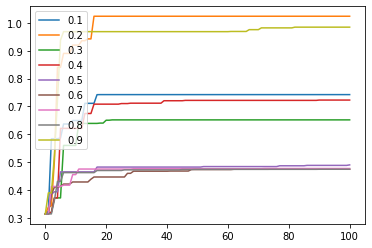

In [28]:
for p in [.1,.2,.3,.4,.5,.6,.7,.8,.9,]:
    np.random.seed(0)
    testRanges = [[-2,2],[-5,5],[-4,7],[-1,2],[-3,3],[-1,1]] 
    optimal = np.array([0,0,0,0,0,0])
    testEval = lambda x: 1/np.sum((x-optimal)**2)**.5
    GA = GeneticAlgorithm(printEvery=25,numPopulation=20,numSurvived=2,mutationProbs=[p]*len(testRanges),\
                          evaluateFunction=testEval,ranges=testRanges)
    print("initial pop",GA.population,"\n")
    for i in range(100):
        GA.reproduction(i+1)
    GA.evaluation()
    maxHist,avgHist,varHist = GA.hist
    array = maxHist
    plt.plot(np.arange(len(array)),array,label=str(p))
    print("final pop",GA.population)
plt.legend()

====
iteration 0 
max fitness 0.3144 , avg fitness 0.1991 , min fitness 0.126 , variance 0.003 
====

initial pop [array([ 0.19525402,  2.15189366,  2.63039714,  0.63464955, -0.4580712 ,
        0.29178823]), array([-0.24965115,  3.91773001,  6.60029037,  0.15032456,  1.75035023,
        0.05778984]), array([ 0.27217824,  4.25596638, -3.21860336, -0.7386121 , -2.87868962,
        0.66523969]), array([ 1.112627  ,  3.70012148,  6.76480176,  1.39747569, -0.23112383,
        0.56105835]), array([-1.5269023 ,  1.39921021, -2.42311384,  1.83400675,  0.13108993,
       -0.17067612]), array([-0.94177755,  2.74233689,  1.01765365,  0.70530185, -2.8872612 ,
        0.23527099]), array([ 0.44838289,  1.16933997,  6.38122886,  1.0454609 , -0.8429526 ,
       -0.12593609]), array([ 0.79052478, -4.39774528,  3.33443387,  1.01191361, -1.73770463,
       -0.7421474 ]), array([-0.7382866 , -1.36289229,  2.27216447,  0.31580454,  2.93024303,
       -0.79591038]), array([-1.16449298, -3.38690482,  3.184

        0.38494424])]
====
iteration 0 
max fitness 0.3144 , avg fitness 0.1991 , min fitness 0.126 , variance 0.003 
====

initial pop [array([ 0.19525402,  2.15189366,  2.63039714,  0.63464955, -0.4580712 ,
        0.29178823]), array([-0.24965115,  3.91773001,  6.60029037,  0.15032456,  1.75035023,
        0.05778984]), array([ 0.27217824,  4.25596638, -3.21860336, -0.7386121 , -2.87868962,
        0.66523969]), array([ 1.112627  ,  3.70012148,  6.76480176,  1.39747569, -0.23112383,
        0.56105835]), array([-1.5269023 ,  1.39921021, -2.42311384,  1.83400675,  0.13108993,
       -0.17067612]), array([-0.94177755,  2.74233689,  1.01765365,  0.70530185, -2.8872612 ,
        0.23527099]), array([ 0.44838289,  1.16933997,  6.38122886,  1.0454609 , -0.8429526 ,
       -0.12593609]), array([ 0.79052478, -4.39774528,  3.33443387,  1.01191361, -1.73770463,
       -0.7421474 ]), array([-0.7382866 , -1.36289229,  2.27216447,  0.31580454,  2.93024303,
       -0.79591038]), array([-1.1644929

====
iteration 100 
max fitness 1.5154 , avg fitness 0.8308 , min fitness 0.2533 , variance 0.1034 
====

====
iteration final 
max fitness 1.5154 , avg fitness 0.8308 , min fitness 0.2533 , variance 0.1034 
====

final pop [array([ 0.11392794, -0.09488107, -0.50218503,  0.24278898,  0.13108993,
        0.29178823]), array([ 0.43773977, -0.18097988, -0.50218503,  0.24278898,  0.13108993,
        0.29178823]), array([-0.24417002, -0.20274073, -0.50218503,  0.24278898,  0.45567897,
        0.29178823]), array([ 0.09647415,  0.40824567, -0.50218503,  0.24278898,  0.45567897,
        0.29178823]), array([ 0.54706931, -0.51130398, -0.50218503,  0.24278898,  0.13108993,
        0.29178823]), array([-0.06653409,  0.33463186, -0.50218503, -0.71817847,  0.45567897,
        0.29178823]), array([ 0.39614129,  0.26566671, -0.50218503, -0.71817847,  0.45567897,
        0.29178823]), array([ 0.57442525, -0.01160388, -0.50218503, -0.71817847,  0.45567897,
        0.29178823]), array([-0.15534677,  0.

====
iteration 50 
max fitness 1.0614 , avg fitness 0.6561 , min fitness 0.2358 , variance 0.0588 
====

====
iteration 75 
max fitness 1.2162 , avg fitness 0.8845 , min fitness 0.3684 , variance 0.0562 
====

====
iteration 100 
max fitness 1.2162 , avg fitness 0.8687 , min fitness 0.1907 , variance 0.1407 
====

====
iteration final 
max fitness 1.2162 , avg fitness 0.8687 , min fitness 0.1907 , variance 0.1407 
====

final pop [array([ 0.25601143,  0.08149604, -0.50218503,  0.24278898,  0.45567897,
        0.29178823]), array([ 0.04517637,  0.08824118, -0.50218503,  0.24278898,  0.45567897,
       -0.51114882]), array([-0.40931333,  0.14354267, -0.50218503,  0.24278898,  0.45567897,
        0.29178823]), array([ 0.04517637,  0.10677046, -0.50218503,  0.24278898,  0.45567897,
       -0.51114882]), array([-0.12962678,  0.02335436, -0.50218503,  0.24278898,  0.45567897,
       -0.51114882]), array([-0.08484394, -0.21251959, -0.50218503,  0.24278898,  0.45567897,
       -0.51114882]), a

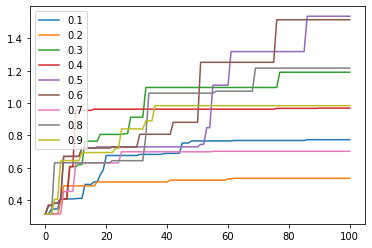

In [34]:
for p in [.1,.2,.3,.4,.5,.6,.7,.8,.9,]:
    np.random.seed(0)
    testRanges = [[-2,2],[-5,5],[-4,7],[-1,2],[-3,3],[-1,1]] 
    optimal = np.array([0,0,0,0,0,0])
    testEval = lambda x: 1/np.sum((x-optimal)**2)**.5
    GA = GeneticAlgorithm(printEvery=25,numPopulation=20,numSurvived=15,mutationProbs=[p]*len(testRanges),\
                          evaluateFunction=testEval,ranges=testRanges)
    print("initial pop",GA.population,"\n")
    for i in range(100):
        GA.reproduction(i+1)
    GA.evaluation()
    maxHist,avgHist,varHist = GA.hist
    array = maxHist
    plt.plot(np.arange(len(array)),array,label=str(p))
    print("final pop",GA.population)
plt.legend()

====
iteration 0 
max fitness 8.652 , avg fitness 2.2204 , min fitness 0.5211 , variance 4.6583 
====

initial pop [array([0.19525402]), array([0.86075747]), array([0.4110535]), array([0.17953273]), array([-0.3053808]), array([0.58357645]), array([-0.24965115]), array([1.567092]), array([1.85465104]), array([-0.46623392]), array([1.16690015]), array([0.11557968]), array([0.27217824]), array([1.70238655]), array([-1.71585577]), array([-1.6514828]), array([-1.91912641]), array([1.33047938]), array([1.112627]), array([1.48004859])] 

====
iteration 25 
max fitness 148.909 , avg fitness 22.9814 , min fitness 0.2267 , variance 2798.9915 
====

====
iteration 50 
max fitness 327.1384 , avg fitness 66.3648 , min fitness 0.2276 , variance 17004.012 
====

====
iteration 75 
max fitness 327.1384 , avg fitness 33.3913 , min fitness 0.2335 , variance 9588.0294 
====

====
iteration 100 
max fitness 327.1384 , avg fitness 82.1786 , min fitness 0.1997 , variance 20002.0617 
====

====
iteration fin

====
iteration 25 
max fitness 14.294 , avg fitness 11.0601 , min fitness 0.2337 , variance 32.0774 
====

====
iteration 50 
max fitness 466.119 , avg fitness 373.2783 , min fitness 0.8248 , variance 34477.6244 
====

====
iteration 75 
max fitness 466.119 , avg fitness 349.9094 , min fitness 0.2927 , variance 40514.3603 
====

====
iteration 100 
max fitness 466.119 , avg fitness 326.4335 , min fitness 0.2372 , variance 45528.0622 
====

====
iteration final 
max fitness 466.119 , avg fitness 326.4335 , min fitness 0.2372 , variance 45528.0622 
====

final pop [array([0.00214538]), array([0.00214538]), array([-2.12785929]), array([1.29800249]), array([0.00214538]), array([0.00214538]), array([0.00214538]), array([0.00214538]), array([-4.2161059]), array([3.42144819]), array([0.00214538]), array([0.00214538]), array([0.00214538]), array([-1.19645335]), array([0.00214538]), array([0.00214538]), array([0.00214538]), array([0.00214538]), array([0.00214538]), array([-2.50361])]
====
itera

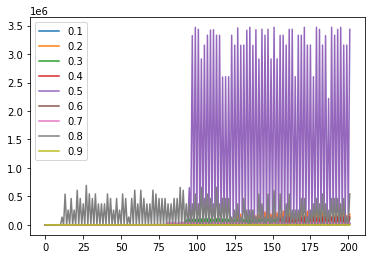

In [335]:
for p in [.1,.2,.3,.4,.5,.6,.7,.8,.9,]:
    np.random.seed(0)
    testRanges = [[-2,2]]#[-5,5],[-4,7],[-1,2]]#,[-3,3],[-1,1]] 
    optimal = np.array([0])#,0,0,0])#,0,0])
    testEval = lambda x: 1/np.sum((x-optimal)**2)**.5
    GA = GeneticAlgorithm(printEvery=25,numPopulation=20,numSurvived=2,mutationProbs=[p]*len(testRanges),\
                          evaluateFunction=testEval,ranges=testRanges)
    print("initial pop",GA.population,"\n")
    for i in range(100):
        GA.reproduction(i+1)
    GA.evaluation()
    maxHist,avgHist,varHist = GA.hist
    array = avgHist
    plt.plot(np.arange(len(array)),array,label=str(p))
    print("final pop",GA.population)
plt.legend()

====
iteration 0 
max fitness 8.652 , avg fitness 2.2204 , min fitness 0.5211 , variance 4.6583 
====

initial pop [array([0.19525402]), array([0.86075747]), array([0.4110535]), array([0.17953273]), array([-0.3053808]), array([0.58357645]), array([-0.24965115]), array([1.567092]), array([1.85465104]), array([-0.46623392]), array([1.16690015]), array([0.11557968]), array([0.27217824]), array([1.70238655]), array([-1.71585577]), array([-1.6514828]), array([-1.91912641]), array([1.33047938]), array([1.112627]), array([1.48004859])] 

====
iteration 25 
max fitness 148.909 , avg fitness 22.9814 , min fitness 0.2267 , variance 2798.9915 
====

====
iteration 50 
max fitness 327.1384 , avg fitness 66.3648 , min fitness 0.2276 , variance 17004.012 
====

====
iteration 75 
max fitness 327.1384 , avg fitness 33.3913 , min fitness 0.2335 , variance 9588.0294 
====

====
iteration 100 
max fitness 327.1384 , avg fitness 82.1786 , min fitness 0.1997 , variance 20002.0617 
====

====
iteration fin

====
iteration 25 
max fitness 14.294 , avg fitness 11.0601 , min fitness 0.2337 , variance 32.0774 
====

====
iteration 50 
max fitness 466.119 , avg fitness 373.2783 , min fitness 0.8248 , variance 34477.6244 
====

====
iteration 75 
max fitness 466.119 , avg fitness 349.9094 , min fitness 0.2927 , variance 40514.3603 
====

====
iteration 100 
max fitness 466.119 , avg fitness 326.4335 , min fitness 0.2372 , variance 45528.0622 
====

====
iteration final 
max fitness 466.119 , avg fitness 326.4335 , min fitness 0.2372 , variance 45528.0622 
====

final pop [array([0.00214538]), array([0.00214538]), array([-2.12785929]), array([1.29800249]), array([0.00214538]), array([0.00214538]), array([0.00214538]), array([0.00214538]), array([-4.2161059]), array([3.42144819]), array([0.00214538]), array([0.00214538]), array([0.00214538]), array([-1.19645335]), array([0.00214538]), array([0.00214538]), array([0.00214538]), array([0.00214538]), array([0.00214538]), array([-2.50361])]
====
itera

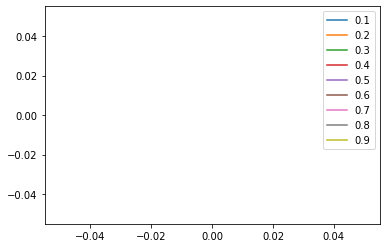

In [336]:
for p in [.1,.2,.3,.4,.5,.6,.7,.8,.9,]:
    np.random.seed(0)
    testRanges = [[-2,2]]#[-5,5],[-4,7],[-1,2]]#,[-3,3],[-1,1]] 
    optimal = np.array([0])#,0,0,0])#,0,0])
    testEval = lambda x: 1/np.sum((x-optimal)**2)**.5
    GA = GeneticAlgorithm(printEvery=25,numPopulation=20,numSurvived=2,mutationProbs=[p]*len(testRanges),\
                          evaluateFunction=testEval,ranges=testRanges)
    print("initial pop",GA.population,"\n")
    for i in range(100):
        GA.reproduction(i+1)
    GA.evaluation()
    maxHist,avgHist,varHist = GA.hist
    array = varHist
    plt.plot(np.arange(len(array)),array,label=str(p))
    print("final pop",GA.population)
plt.legend()

In [327]:
len(maxHist)

5

In [293]:
x = np.arange(10)

condlist = [x%2==0]

choicelist = [x]

np.select(condlist, choicelist)

array([0, 0, 2, 0, 4, 0, 6, 0, 8, 0])

In [156]:
optimal = np.array([0.1,0.1,0.1,0.1,0.1,0.1])
b=np.array([1,2,3,4])
optimal[b].astype(int)

array([0, 0, 0, 0])

In [100]:
round(0.1001,2)

0.1

In [16]:
np.where(np.array([True,False,True]))

(array([0, 2]),)

In [22]:
np.random.randint(10037272_Kyle_Rong_15680059_202008210722_Resume.pdf)

1

In [33]:
ranges = [(1,10),(3,100),(-100,-1000)]
mutationScale = 1
indicesChosen = np.array([0,2])
np.array([np.random.uniform(mutationScale*(upper-lower)) \
                                if index in indicesChosen else 0\
                                  for index,(lower,upper) in enumerate(ranges) \
                                  ])

array([   8.76956223,    0.        , -599.5489991 ])

In [38]:
a=np.arange(20).reshape((5,-1))
b=lambda x: x[0]
a,b(a)

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]]),
 array([0, 1, 2, 3]))